This jupyter notebook will serve as the notebook for your capstone project. Each week we will add new sections to the this notebook and you will submit the entire notebook for the weekly assignment. 

# Introduction

Week 1: write 1-2 paragraphs introducing your project idea. 

Banks in the Financial industry are facing huge competitive marketplace and if they are not able to keep the existing customers then they will not only lose brand reputation but will also have a negative impact on its revenues. It is expensive to acquire new customers than retain existing. Lower attrition rates indicate positive customer-bank relationship and higher churning rate might indicate the dissatisfaction in services provided by the bank that leads the customers to cut the ties with it. Customer churn management plays an important role in any organization to increase their long term profits. Any bank should focus on reducing the loyal customers churn rate since the probability of selling any service to an existing and loyal customer is a lot higher than to a new prospective customer.

In recent studies conducted by Bain and Company(2018) for UK banking industry, there is risk of 63% of their highly valued customers( in survey of 4000 UK customers) of leaving due to new rules of using open appilcation programming interface that requires banks to disclose their fee and performance data.This will have aggregators with which customers can compare services, transfer or manange transactions with multiple banks on a single platform. Traditional banks, sees that as threat since their is risk that their loyal customers along with new customers may switch to such aggregators and thery by stopping the use of traditional bank services. In this project, the idea is to predict the customer churn rate for a bank that is loyal for more than 3 years through machine learning using a variety of predictive modeling techniques such as classification utilizing Python programming. The dataset has a variable as "Tenure" which indicates length of stay of customer which has been considered to indicate the loyal customer in case if it more than 3 years since those customers might be using the traditional bank services for long time but are likely to switch due to new changes. The features will be created for prediction models and based on the performance the best approach will be selected. Such predictive models can help a bank to identify the percentages of loyal customers that are likely to leave so that bank can take preventive actions to reduce the churn by improving their services and maximize the chances that the customer will remain a customer.

References:
Coping with the Challenge of Open Banking. (2018, August 20). Retrieved from https://www.bain.com/insights/coping-with-the-challenge-of-open-banking/

# Dataset

Week 1: provide a link to the datasource and briefly describe what it is. 

The bank dataset has been taken from kaggle and corresponds to customer data for an unknown bank.The dataset has customer details for three geographical locations namely France,Spain and Germany.It has bank details of each customer with its balance, expected salary, credit score along with age, number of products that the customer is affiliated with etc.I found that, this dataset has two columns "Tenure" and "Exited" that can help to fulfil the project objective to predict the bank customer churn rate, i.e. customer that was associated with bank for more than 3 years will leave bank or not.

Dataset link: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Dataset name: Churn_Modelling.csv

This dataset has 10000 rows with 14 columns with following description:

RowNumber       : Row Identifier of dataset

CustomerId      : Unique identifier for a customer

CreditScore     : A number that represents customer's creditworthiness

Geography       : Country of customer; France,Spain and Germany

Gender          : Gender of customer; Male or Female

Age             : Age of customer

Tenure          : Length of stay of the customer in the bank in years

Balance         : Balance in the bank account

NumOfProducts   : Number of bank affiliated products that customer has

HasCrCard       : If customer has credit card or not;0 or 1

IsActiveMember  : If customer is active or not; 0 or 1

EstimatedSalary : Estimated salary of customer

Exited          : If customer has left the bank or not;0 or 1


# Project Definition

Week 1: write a sentence that defines exactly what you are trying to predict (remember it has to be 2 classes). For example:  For each diabetes patient, this project will predict if that patient will be readmitted within 30 days. 

This project will "predict if a customer that was loyal for more than 3 years will disassociate with the bank".

# Data Exploration

Week 1: Write Python code to 

1) load your dataset into a dataframe (df)

2) define an OUTPUT_LABEL

3) calculate the prevalence of the positive class

In [717]:
# Install required package and load bank churn dataset
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')

In [718]:
# Check Top 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [719]:
#Descriptive statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [720]:
# Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [721]:
#Subset dataset to find customers that have tenure greater than 3 years 

In [722]:
df = df.loc[df.Tenure > 3]

In [723]:
#Number of rows that have tenure greater than 3 years 
len(df)

6495

In [724]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


Create a column called OUTPUT_LABEL based on your data that is 0 for your negative class and 1 for your positive class

In [725]:
#Create a new column OUTPUT_LABEL for positive class indicating Loyal customer for more than 3 years left the bank
df['OUTPUT_LABEL'] = ((df.Exited == 1) ).astype('int')

In [726]:
#Check OUTPUT_LABEL for Top 10 rows
df[['OUTPUT_LABEL']].head(10)

,OUTPUT_LABEL
2,1
5,1
6,0
7,1
8,0
10,0
12,0
13,0
14,0
17,0


In [727]:
#Check top 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,OUTPUT_LABEL
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0


Calculate the prevalence of the positive class

In [728]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [729]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.200


Week 1: in relation to your project, describe what the prevalence is.  

Prevalence indicates 20% of customers(in 6495) will dissociate with bank that have tenure more than 3 years.



Week 1: Stop here

Week 2: briefly explore the columns and unique values of your dataset. 

In [730]:
# Number of columns
print('Number of columns:',len(df.columns))

Number of columns: 15


In [731]:
# Find unique values for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

RowNumber: 6495 unique values
CustomerId: 6495 unique values
Surname: 2287 unique values
CreditScore: 451 unique values
Geography
['France' 'Spain' 'Germany']
Gender
['Female' 'Male']
Age: 68 unique values
Tenure
[ 8  7  4  6 10  5  9]
Balance: 4099 unique values
NumOfProducts
[3 2 4 1]
HasCrCard
[1 0]
IsActiveMember
[0 1]
EstimatedSalary: 6495 unique values
Exited
[1 0]
OUTPUT_LABEL
[1 0]


Week 2: briefly describe your observations of the dataset

Following is overview of the columns in the dataset.

    -RowNumber, CustomerId are numerical but are just identifiers of a customer and are not useful variables.

    -Surname is last name of customer and is part of identification of a customer and is not useful variable.

    -CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary are numerical variables.

    -IsActiveMember,HasCrCard,Exited are numerical variables with binary values 0 and 1.

    -Geography and Gender are categorical variables.

# Feature Engineering

Week 2: Briefly describe what 'feature engineering' is. For each feature type (e.g. numerical, categorical, etc) you have in your project, please describe what is it is. If you use one-hot encoding, please describe in your own words what that technique is. 

Feature engineering is transforming raw data by creating new input features to boost the performance of predictive model.In this project there are two types of feature types that have been created; numerical and categorical.Machines can only understand numbers and hence numerical data is essential part of machine learning. 

CreditScore, Age, Balance,NumOfProducts,HasCrCard,IsActiveMember,Tenure and EstimatedSalary are numerical variables and hence will be selected as Numerical Features.To avoid the data leakage, the column "Exited" is excluded from feature selection.This dataset contains two categorical variables as Gender and Geography and need to be converted into numbers.

One-hot encoding is applied to categorical variables for binary vector representation.In this type of encoding, the value is "1" if for that instance the original feature takes that value and "0" otherwise.



## Numerical Features

In [732]:
cols_num = ['CreditScore','Age', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Tenure']

In [733]:
#Missing data
df[cols_num].isnull().sum()

CreditScore        0
Age                0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Tenure             0
dtype: int64

## Categorical Features

In [734]:
cols_cat = ['Geography','Gender']

In [735]:
#Missing data
df[cols_cat].isnull().sum()

Geography    0
Gender       0
dtype: int64

In [736]:
# Since columns are correlated, first column of each categorical feature is dropped.
pd.get_dummies(df[cols_cat],drop_first = True).head()

,Geography_Germany,Geography_Spain,Gender_Male
2,0,0,0
5,0,1,1
6,0,0,1
7,1,0,0
8,0,0,1


In [737]:
df_cat = pd.get_dummies(df[cols_cat],drop_first = True)

In [738]:
df_cat.head()

,Geography_Germany,Geography_Spain,Gender_Male
2,0,0,0
5,0,1,1
6,0,0,1
7,1,0,0
8,0,0,1


In [739]:
df = pd.concat([df,df_cat],axis = 1)


In [740]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,OUTPUT_LABEL,Geography_Germany,Geography_Spain,Gender_Male
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,0,1,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,0,0,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,1,0,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,0,0,1


In [741]:
cols_all_cat = list(df_cat.columns)

In [742]:
cols_all_cat

['Geography_Germany', 'Geography_Spain', 'Gender_Male']

## Engineering features summary

In [743]:
print('Total number of features:', len(cols_num + cols_all_cat))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))


Total number of features: 11
Numerical Features: 8
Categorical Features: 3


In [744]:
df[cols_num + cols_all_cat].isnull().sum().sort_values(ascending =False)

Gender_Male          0
Geography_Spain      0
Geography_Germany    0
Tenure               0
EstimatedSalary      0
IsActiveMember       0
HasCrCard            0
NumOfProducts        0
Balance              0
Age                  0
CreditScore          0
dtype: int64

Week 2: Make a new dataframe that only has the columns of interest. Double check that the columns used to define your OUTPUT_LABEL are not part of cols_input! 


In [745]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

Check a few things to catch known bugs. 

In [746]:
# check for duplicated columns in cols_input
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in cols_input'

set()


In [747]:
# check for duplicated columns in df_data
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in df_data'

set()


In [748]:
# check the size of df_data makes sense
assert (len(cols_input) + 1) == len(df_data.columns), 'issue with dimensions of df_data or cols_input'

# Building Training/Validation/Test Samples

Week 2: In your own words, describe what are training / validation and test samples used for. 

Training Sample: This is percentage of data used to fit the model.

Validation Sample:This is a percenatge of sample that is outside training data, is used to compare the performance of different models and select a model among them.

Test Sample:The test sample is used to evaluate the model and used to obtain the performance characteristics such as accuracy, precision etc.

Week 2: Create a training (df_train_all), validation (df_valid) and test (df_test) set. 

In [749]:
# shuffle the samples
df_data = df_data.sample(n=len(df_data),random_state = 42)
df_data = df_data.reset_index(drop = True)
df_data.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Tenure,Geography_Germany,Geography_Spain,Gender_Male,OUTPUT_LABEL
0,615,19,0.00,2,1,0,159920.92,5,0,1,1,0
1,628,31,175443.75,1,1,0,113167.17,6,0,0,0,1
2,645,36,0.00,2,1,1,12096.61,8,0,0,0,1
3,668,46,161806.09,1,1,1,173052.19,7,1,0,0,0
4,731,40,118991.79,1,1,1,156048.64,7,0,0,0,0


In [750]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [751]:
# Save 50% of the data in validation and test samples
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)
print('Split size: %.3f'%(len(df_test)/len(df_valid_test)))

Split size: 0.500


In [752]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [753]:
df_data.drop(df_valid_test.index)

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Tenure,Geography_Germany,Geography_Spain,Gender_Male,OUTPUT_LABEL
0,615,19,0.00,2,1,0,159920.92,5,0,1,1,0
1,628,31,175443.75,1,1,0,113167.17,6,0,0,0,1
2,645,36,0.00,2,1,1,12096.61,8,0,0,0,1
3,668,46,161806.09,1,1,1,173052.19,7,1,0,0,0
4,731,40,118991.79,1,1,1,156048.64,7,0,0,0,0
5,710,47,158623.14,1,0,0,83499.89,5,0,0,1,1
6,774,46,0.00,2,1,1,34774.26,9,0,1,1,0
7,504,73,0.00,1,1,1,34595.58,8,0,0,0,0
9,677,38,0.00,2,1,0,187800.63,4,0,0,1,0
10,613,26,100446.57,1,0,1,149653.81,4,0,0,1,0


In [754]:
# check the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 974):0.193
Valid prevalence(n = 974):0.196
Train all prevalence(n = 4547):0.202


In [755]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 6495)


Week 2: take your df_train_all and create a balanced dataset. Briefly explain in your own words why we need to balance and a few techniques for balancing the dataset. 

Imbalance dataset implies the unequal distribution of classes in a dataset.Due to imbalance, the majority class  dominates the minority class thereby machine learning classifiers are more inclined or biased towards majority class in case of prediction.The main goal of balancing classes is to increase the frequency of minority class or reduce the frequency of the majority class. Following are some of the balancing techiques.
1. Random Under-Sampling: 
In this case, the majority class data points are removed randomly.This can help to resolve the storage problems to store large training dataset but in turn can remove the important information.
2. Random Over-Sampling: 
In this case,the number of instances in the minority class are increases by replicating them.This method increases the likelihood of overfitting due to increase in representation of minority class.
3. Cluster-Based Over Sampling
In this case K-means cluster is applied such all samples have same size.
4. Informed Over Sampling , Synthetic Minority Over-sampling Technique(SMOTE) 
In this case, synthetic data is formed by taking subset from a minority class.These synthetic instances are added to original dataset.
5. Modified synthetic minority oversampling technique (MSMOTE):
It is modified SMOTE algorithm. In this case, the samples are classified into three groups - Security/Safe, Border and Latent nose samples which is done by calculating distances between the instances.Here, the datapoint from KNN is selected for security sample and then selects nearest neighbour from border sample and nothing is done on latent noise sample.

References:
Blog, G. (2018, April 27). How to handle Imbalanced Classification Problems in machine learning? Retrieved from https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

In [756]:
# split the training data into positive and negative

In [757]:
rows_pos = df_train_all.OUTPUT_LABEL == 1


In [758]:
rows_pos.head()

0    False
1     True
2     True
3    False
4    False
Name: OUTPUT_LABEL, dtype: bool

In [759]:
df_train_pos = df_train_all.loc[rows_pos]

In [760]:
df_train_pos.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Tenure,Geography_Germany,Geography_Spain,Gender_Male,OUTPUT_LABEL
1,628,31,175443.75,1,1,0,113167.17,6,0,0,0,1
2,645,36,0.00,2,1,1,12096.61,8,0,0,0,1
5,710,47,158623.14,1,0,0,83499.89,5,0,0,1,1
16,716,66,121411.90,1,0,0,10070.40,5,1,0,1,1
32,497,41,80542.81,1,0,0,88729.22,5,1,0,1,1


In [761]:
df_train_neg = df_train_all.loc[~rows_pos]


In [762]:
df_train_neg.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Tenure,Geography_Germany,Geography_Spain,Gender_Male,OUTPUT_LABEL
0,615,19,0.00,2,1,0,159920.92,5,0,1,1,0
3,668,46,161806.09,1,1,1,173052.19,7,1,0,0,0
4,731,40,118991.79,1,1,1,156048.64,7,0,0,0,0
6,774,46,0.00,2,1,1,34774.26,9,0,1,1,0
7,504,73,0.00,1,1,1,34595.58,8,0,0,0,0


In [763]:
import numpy as np
n= np.min([len(df_train_pos),len(df_train_neg)])
n

917

In [764]:
# merge the balanced data

df_train=pd.concat([df_train_pos.sample(n=n,random_state = 42),
                    df_train_neg.sample(n=n,random_state =42)],axis =0,
                    ignore_index =True)

In [765]:
df_train.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Tenure,Geography_Germany,Geography_Spain,Gender_Male,OUTPUT_LABEL
0,702,44,0.00,1,0,0,59207.41,9,0,1,1,1
1,659,67,117411.60,1,1,1,45071.09,6,1,0,1,1
2,577,43,79757.21,1,1,0,135650.72,8,0,1,1,1
3,594,56,0.00,1,1,0,26215.85,7,0,0,0,1
4,798,58,0.00,2,0,0,119071.56,9,0,1,0,1


In [766]:
# shuffle the order of training samples 
df_train = df_train.sample(n=len(df_train),random_state =42).reset_index(drop=True)

In [767]:
print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 1834):0.500


Week 2: Save all 4 dataframes to csv and the cols_input

In [768]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [769]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

Week 2: fill any missing values with the mean value

In [770]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [771]:
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [772]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,CreditScore,650.499450
1,Age,38.885639
2,Balance,75033.211190
3,NumOfProducts,1.532659
4,HasCrCard,0.705740


In [773]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [774]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (4547, 11)
Training shapes: (1834, 11) (1834,)
Validation shapes: (974, 11) (974,)


Week 2: create a scalar, save it, and scale the X matrices

In [775]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [776]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [777]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [778]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

# Model Selection 

In [779]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive. 

In [780]:
thresh = 0.5

## Model Selection: baseline models

### K nearest neighbors (KNN)

Week 2: Briefly describe how KNN works in your own words. 

K nearest neighbor is a type of supervised algorithm based on similar features. It is used to find the nearest neighboring class which calculates the distance of the new point to other data points in the training dataset. It then selects the K-nearest data points and assigns the data points where the majority of K data points belong. 

This algorithm is easy to understand and implement. But it doesn’t learn anything from the training dataset, hence it doesn’t generalize well and is not robust to noisy data. 


Week 2: train a KNN and evaluate performance

In [781]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [782]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.810
accuracy:0.725
recall:0.656
precision:0.761
specificity:0.779
prevalence:0.500
 
Validation:
AUC:0.785
accuracy:0.737
recall:0.613
precision:0.391
specificity:0.757
prevalence:0.196
 


Week 2: STOP HERE

### Logistic Regression

Week 3: Briefly describe how logistic regression works in your own words. 

The logistic regression is a type of statistical regression which is used for predictive analysis where the dependent variable is binary or dichotomous. It is similar to linear regression but the linear model assumes that the probability p is a linear function of the independent variables, while the logistic model assumes that the natural log of the odds p/(1-p) is a linear function of the independent variables.Logistic regression transforms its output using the logistic sigmoid function and the predictions of logistic regression are always discrete and can be used for binary, multinomial or ordinal regressions. For example, predicting if a patient “healthy” or “not healthy” or bank customers “will stop” or “not stop” services, can be done using binary logistic regression. In the case of logistic regression, predictors don’t have to be normally distributed. Logistic regression is very efficient to train the model and resistant for overfitting.

Week 3: train a logistic regression and evaluate the performance

In [783]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [784]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.780
accuracy:0.715
recall:0.709
precision:0.718
specificity:0.722
prevalence:0.500
 
Validation:
AUC:0.754
accuracy:0.708
recall:0.649
precision:0.364
specificity:0.723
prevalence:0.196
 


### Stochastic Gradient Descent

Week 3: Briefly describe how stochastic gradient descent works in your own words. 

Stochastic Gradient descent is a machine learning algorithm used to find the parameters values for minimizing the cost function. In this weights are updated after every training sample. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction.Since only one sample is processed at a time, the learning is faster than standard gradient descent. But as the updates are done after every sample, updates will be noisy and so the corresponding cost function.

Week 3: train a stochastic gradient descent model and evaluate the performance

In [785]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [786]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descent')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descent
Training:
AUC:0.779
accuracy:0.715
recall:0.707
precision:0.718
specificity:0.723
prevalence:0.500
 
Validation:
AUC:0.755
accuracy:0.708
recall:0.665
precision:0.366
specificity:0.719
prevalence:0.196
 


### Naive Bayes

Week 3: Briefly describe how naive bayes works in your own words. 

Naive Bayes is a supervised classification algorithm is a conditional probability model. It is based on Bayes theorem with an assumption that all the features are independent of each other and required small data to train. According to the Bayes theorem, probability of event A is happening can be found, given the probability of event B. In the case of Naive Bayes algorithm, the relationship of the target variable and features can be found on the basis of Bayes Theorem. The classifier is called “naive” since a particular feature doesn’t influence the other feature. It can be quicker than models like logistic regression and highly scalable.

Week 3: train naive bayes model and evaluate the performance

In [787]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [788]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.794
accuracy:0.715
recall:0.684
precision:0.730
specificity:0.747
prevalence:0.500
 
Validation:
AUC:0.768
accuracy:0.725
recall:0.649
precision:0.382
specificity:0.743
prevalence:0.196
 


### Decision Tree Classifier

Week 3: Briefly describe how decision tree model works in your own words. 

Decision trees is a type of supervised learning algorithm used to solve classification and regression problems. In this case, the model learns to partition according to a certain attribute. In a decision tree, internal nodes represent attributes or features, the top node is called root and branch represents the decision rule. The prediction starts from root node and it is compared with record attribute. Based on comparison and decision rule, traversing is done from root to leaf node.  The splitting of dataset into smaller and smaller subsets continues until the maximum depth of the tree is reached and no further gain is made.

Week 3: train decision tree model and evaluate the performance

In [789]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 5,random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [790]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.856
accuracy:0.763
recall:0.748
precision:0.772
specificity:0.778
prevalence:0.500
 
Validation:
AUC:0.791
accuracy:0.732
recall:0.644
precision:0.389
specificity:0.752
prevalence:0.196
 


### Random Forest

Week 3: Briefly describe how random forest model works in your own words. 

Random forest can be used for solving classification and regression problems. It is a supervised machine learning algorithm and created based on multiple decision trees. It then gets the prediction from each tree and based on majority vote creates the final prediction. The input of each decision tree is sampled from the original dataset. Random Forest adds additional randomness to the model and the advantage of this model is that it prevents overfitting since it takes the average of all the predictions and thereby removing the biases in the prediction. 

Week 3: train random forest model and evaluate the performance

In [791]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(max_depth = 5, random_state = 42)
rf.fit(X_train_tf, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [792]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.882
accuracy:0.796
recall:0.748
precision:0.827
specificity:0.843
prevalence:0.500
 
Validation:
AUC:0.814
accuracy:0.774
recall:0.686
precision:0.450
specificity:0.796
prevalence:0.196
 


### Gradient Boosting Classifier

Week 3: Briefly describe how gradient boosting classifier model works in your own words. 

Gradient Boosting Classifier is a machine learning algorithm for prediction which creates a new tree to fix the shortcomings identified in previous trees. At each step, weak learner is added to increase the performance and to build a strong learner. The loss value is computed and the objective of this algorithm to minimize it and minimizing the residuals. The disadvantages of this model are that it can be overfitting and can slow during training since trees are built sequentially.

Week 3: train gradient boosting model and evaluate the performance

In [793]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [794]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:1.000
accuracy:0.995
recall:0.996
precision:0.995
specificity:0.995
prevalence:0.500
 
Validation:
AUC:0.793
accuracy:0.731
recall:0.707
precision:0.396
specificity:0.737
prevalence:0.196
 


## Analyze results baseline models

Let's make a dataframe with these results and plot the outcomes using a package called seaborn.

In [795]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,]})

In [796]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

Week 3: Pick one performance metric that you will use for picking the best model. Explain your choice of performance metric. Make a bar plot of this performance metric below to demonstrate the baseline performance. 

I have used AUC(Area Under curve) metric to evaluate and compare the performances of all the classifiers.AUC indicates how well the probabilities of positive are separated from negative classes. 


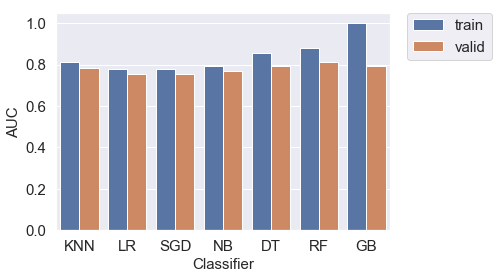

In [797]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

Week 3: My current best model is:

KNN, LR, SGD, NB classifiers have less difference in Training and Validation AUC scores. I have chosen Stochastic Gradient Descent ( out of all other classifiers)as current best model. I have chosen it for further performance imprvements based on the AUC performance metric as the Training and Validation AUC score difference is minimum. It has 75.5% of AUC score with validation data and 77.9% of AUC score with training data. 

Week 3: Using your best baseline model, pick a hyperparameter and show its effect for a range of values, similar to what we did for the KNN and K in the diabetes project . This is needed for the discussion post. 

Hyperparameters are the adjustable variables that are used to tuned to control the behaviour machine learning algorithm.I have selected alpha,which is constant that multiplies with regularlization term,  as a hyperparameter for Stochastic Gradient Descent model.

In [798]:
import time

my_params = [0.001, 0.003,0.006,0.009,0.01,0.02,0.03,0.04]# fill this in your list of parameters
#my_params = [100,150,200,250,300,350,400]# fill this in your list of parameters


# initialize arrays for storing the results
train_metrics = np.zeros(len(my_params))
valid_metrics = np.zeros(len(my_params))

# train a model for each param in a list
t1 = time.time()
for jj in range(len(my_params)):
    my_param = my_params[jj]
        
        
    
    # fit model
    model= SGDClassifier(loss = 'log',alpha = my_param, random_state = 42)                         # fill this in
    #model= KNeighborsClassifier(n_neighbors = my_params)                                # fill this in
    model.fit(X_train_tf, y_train)
    # get predictions
    y_train_preds = model.predict_proba(X_train_tf)[:,1]
    y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    metric_train = roc_auc_score(y_train, y_train_preds) # fill this in
    metric_valid = roc_auc_score(y_valid, y_valid_preds) # fill this in

    # save aucs
    train_metrics[jj] = metric_train
    valid_metrics[jj] = metric_valid
    
    # print the time
    t2 = time.time()
    print(my_param, t2-t1)
    t1 = time.time()

0.001 0.009318828582763672
0.003 0.006857872009277344
0.006 0.005264759063720703
0.009 0.005759000778198242
0.01 0.006925106048583984
0.02 0.005934000015258789
0.03 0.007132053375244141
0.04 0.005917072296142578


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

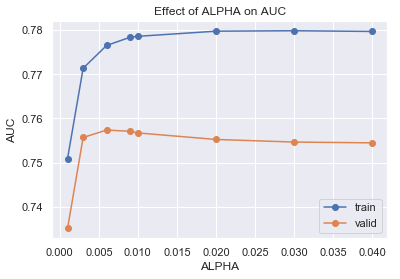

In [799]:
import matplotlib.pyplot as plt

plt.plot(my_params, train_metrics,'o-',label = 'train')
plt.plot(my_params, valid_metrics,'o-',label = 'valid')

plt.xlabel('ALPHA') # fill this in
plt.ylabel('AUC')# fill this in
plt.title('Effect of ALPHA on AUC') # fill this in
plt.legend()
plt.show()

The parameter alpha is a constant that multiplies the regularization term in case of stochastic gradient descent algorithm. The above graph shows AUC when the value of alpha is varied between 0.001 to 0.04. There is no change in Training performance(AUC score) after increasing alpha = 0.02. The  alpha =0.006 seems optimal since validation performance has been declined on further increasing it.

Week 3: STOP HERE

## Learning Curves

Week 4: Using your baseline model that has the best performance on the validation set, plot a learning curve for that model. 

In [800]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

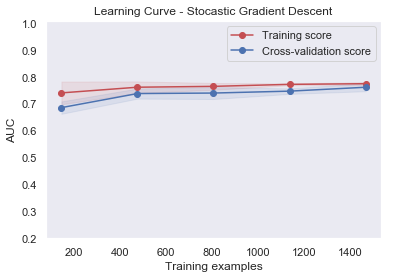

In [801]:
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.


title = 'Learning Curve - Stocastic Gradient Descent'                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = SGDClassifier(loss = 'log',alpha = 0.006,random_state = 42)                                       # fill this in
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

Week 4: Identify if your model has high variance or high bias. Briefly discuss what techniques could be used to improve performance of that model.  

I have used the optimal value of alpha = 0.006 to create above learning curves. From the above plot, it can be seen that there is very small difference between Training and Validation AUC scores which implies, high bias and is a sign of underfitting.When the model performs poorly on training data then it its called underfitting which means model is unable to capture the relationship between the features and dependent variable.  Following some techniques that are used to reduce underfitting(high bias)
1. adding new features in the model.
2. Increasing the complexity of the model
3. Reducing the regularization

## Feature Importance

Week 4: Plot the feature importance for logistic regression and random forest models here. 

In [802]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [803]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

Week 4: Briefly discuss any observations you have of the feature importances. 

In [804]:
feature_importances.head()

,importance
Age,0.795581
Geography_Germany,0.363595
Balance,0.220123
EstimatedSalary,0.108670
NumOfProducts,0.009040


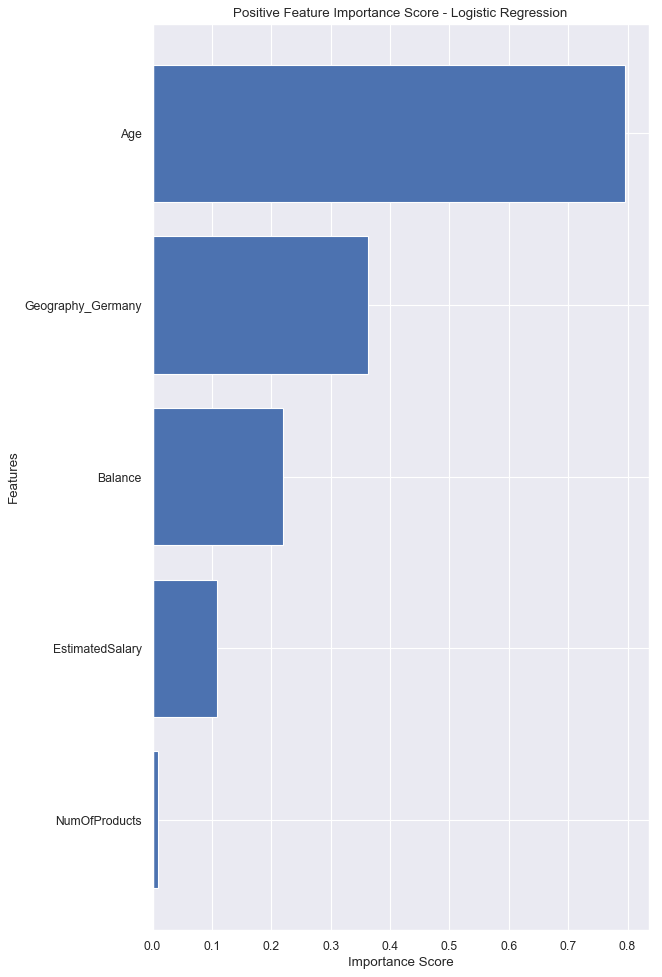

In [805]:
pos_features = feature_importances.loc[feature_importances.importance > 0]

num = np.min([50, len(pos_features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = pos_features.iloc[:num].values.ravel()[::-1]
feature_labels = list(pos_features.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

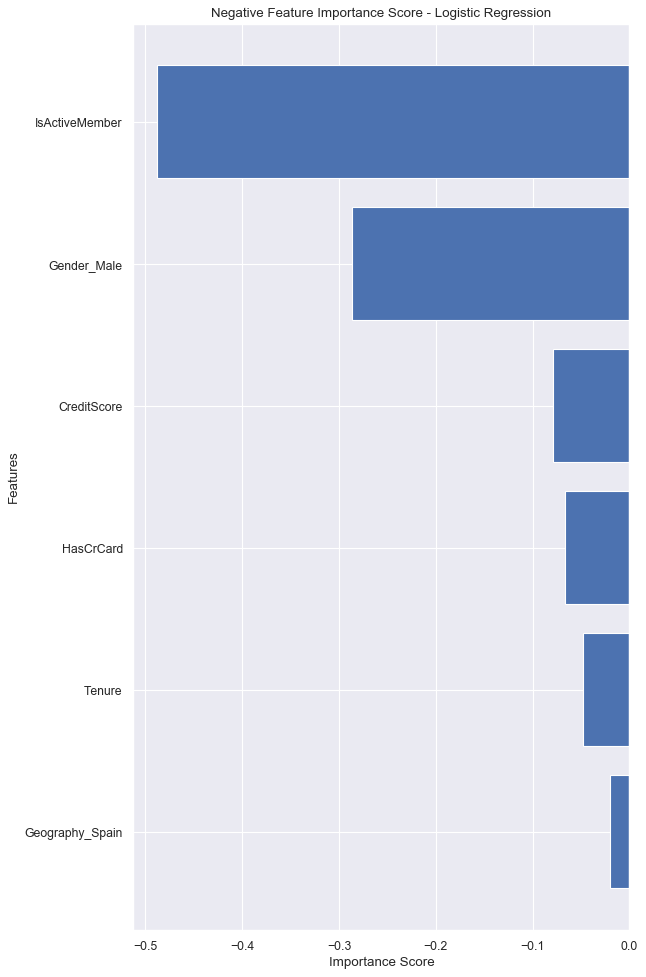

In [806]:
neg_features = feature_importances.loc[feature_importances.importance < 0]

num = np.min([50, len(neg_features)])
ylocs = np.arange(num)

values_to_plot = neg_features.iloc[-num:].values.ravel()
feature_labels = list(neg_features.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

In [807]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [808]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
Age,0.349089
NumOfProducts,0.252505
Balance,0.104463
IsActiveMember,0.077246
Geography_Germany,0.056834


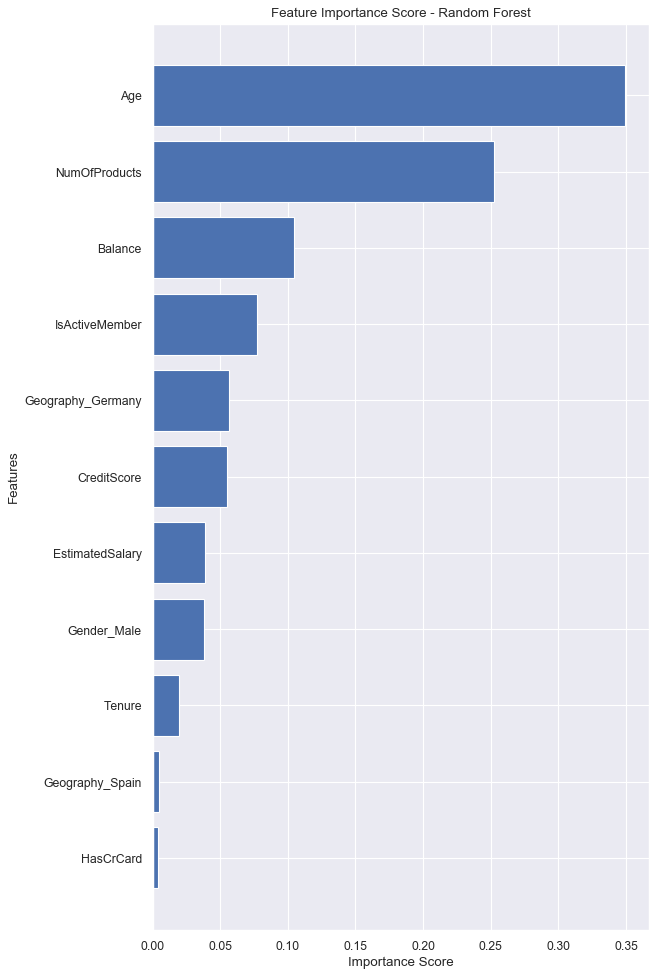

In [809]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

For logistic regression,the features age, Geography_Germany,Balance, EstimatedSalary and NumberofProducts have positive coefficient for predicting customers who exited the bank who had tenure > 3 years. Surprisingly, "Tenure" feature is not one of top important features in predicting the customers who exited the bank.Features such as IsActiveMember, Gender_Male have negative coefficients predicting the customers that will not exit. In Random Forest, Age, NumofProducts, Balance, IsActiveMember and Geography_Spain are top 5 features in predicting who exited the bank who had tenure> 3 years.In this case also, Tenure is not an important feature in the predicting banking customer churn.In both cases (LR and RF), Age is top feature, which implies as the age increases, the customer tends to exit the bank.It is advisable that more features related to age such as marital status, education can be added and researched.


## Hyperparameter tuning

Week 4: Using RandomizedSearchCV, optimize a few of your baseline models. 
    Note that GradientBoosting Classifier may take a while so you might need to adjust the number of iterations or specific parameters. If this takes too long on your computer, feel free to take that one out. 

Optimizing Random Forest

In [810]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [811]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,6)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 6), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [812]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [813]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [814]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   28.0s finished


28.830146074295044


In [815]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 8,
 'max_features': 'auto',
 'max_depth': 8,
 'criterion': 'gini'}

In [816]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random Forest
Training AUC:0.908
Validation AUC:0.815
Optimized Random Forest


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training AUC:0.956
Validation AUC:0.830


Optimizing Stochastic Gradient Descent

In [817]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [818]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,500)
l1_ratio = [0.0001,0.0003,0.0005,0.01]
#learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
alpha = [0.0001,0.003,0.005,0.006,0.01,0.02]
random_grid_sgdc = {'penalty':penalty,
                    'max_iter':max_iter,
                    'l1_ratio':l1_ratio,
                    #'learning_rate':learning_rate,
                    'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19.

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19.

3.0986289978027344


In [819]:
sgdc_random.best_params_

{'penalty': 'l1', 'max_iter': 700, 'l1_ratio': 0.0001, 'alpha': 0.02}

In [820]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
sgdc_train_base_auc = roc_auc_score(y_train, y_train_preds)
sgdc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_base_auc))
print('Validation AUC:%.3f'%(sgdc_valid_base_auc))

print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_opt_auc))
print('Validation AUC:%.3f'%(sgdc_valid_opt_auc))

Baseline sgdc
Training AUC:0.779
Validation AUC:0.755
Optimized sgdc
Training AUC:0.778
Validation AUC:0.756


Optimizing Logistic Regression

In [821]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [835]:
penalty = ['l2','l1']
max_iter = range(200,1000,600)
C = [0.0001,0.0002,0.0003,0.001,0.003]
random_grid_lr = {'penalty':penalty,
              'max_iter':max_iter,
              'C':C}
# create the randomized search cross-validation
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid_lr, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
lr_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.22703909873962402


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [836]:
lr_random.best_params_

{'penalty': 'l2', 'max_iter': 200, 'C': 0.003}

In [837]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline lr')
lr_train_base_auc = roc_auc_score(y_train, y_train_preds)
lr_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(lr_train_base_auc))
print('Validation AUC:%.3f'%(lr_valid_base_auc))

print('Optimized lr')
y_train_preds_random = lr_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = lr_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
lr_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
lr_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(lr_train_opt_auc))
print('Validation AUC:%.3f'%(lr_valid_opt_auc))

Baseline lr
Training AUC:0.780
Validation AUC:0.754
Optimized lr
Training AUC:0.778
Validation AUC:0.755


Optimizing Gradient Boosting

In [838]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [839]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

4.229568958282471


In [840]:
gbc_random.best_params_

{'n_estimators': 150, 'max_depth': 2, 'learning_rate': 0.1}

In [841]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline gbc
Training AUC:1.000
Validation AUC:0.793
Optimized gbc
Training AUC:0.905
Validation AUC:0.835


Optimizing Decision Tree

In [842]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5,random_state = 42)
dt.fit(X_train_tf, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [843]:
# maximum number of features to use at each split
max_features = ['auto','sqrt','log2']
# maximum depth of the tree
max_depth = range(2,20,6)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']
# criterion for evaluating a split
splitter = ['best','random']

# random grid

random_grid_dt = {
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion,
              'splitter':splitter}

print(random_grid_dt)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': range(2, 20, 6), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}


In [844]:
# create the randomized search cross-validation
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid_dt, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
dt_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

0.17011308670043945


In [845]:
y_train_preds = dt.predict_proba(X_train_tf)[:,1]
y_valid_preds = dt.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline dt')
dt_train_base_auc = roc_auc_score(y_train, y_train_preds)
dt_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(dt_train_base_auc))
print('Validation AUC:%.3f'%(dt_valid_base_auc))
print('Optimized dt')
y_train_preds_random = dt_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = dt_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
dt_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
dt_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(dt_train_opt_auc))
print('Validation AUC:%.3f'%(dt_valid_opt_auc))

Baseline dt
Training AUC:0.856
Validation AUC:0.791
Optimized dt
Training AUC:0.893
Validation AUC:0.756


In [851]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','LR','LR','GB','GB','DT','DT'],
                           'data_set':['baseline','optimized']*5,
                          'auc':[sgdc_valid_base_auc,sgdc_valid_opt_auc,
                                 rf_valid_base_auc,rf_valid_opt_auc,
                                 lr_valid_base_auc,lr_valid_opt_auc,
                                 gbc_valid_base_auc,gbc_valid_opt_auc,
                                 dt_valid_base_auc,dt_valid_opt_auc],
                          })

In [852]:
df_results

,classifier,data_set,auc
0,SGD,baseline,0.754696
1,SGD,optimized,0.755929
2,RF,baseline,0.814521
3,RF,optimized,0.830281
4,LR,baseline,0.753846
5,LR,optimized,0.754856
6,GB,baseline,0.792903
7,GB,optimized,0.834778
8,DT,baseline,0.790977
9,DT,optimized,0.756321


Week 4: Make a plot comparing the performance of the optimized models to the baseline models. 

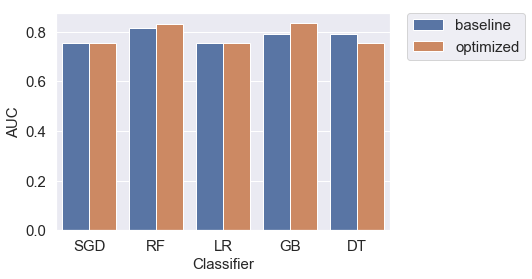

In [854]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Pick your best model

Week 4: Pick your best model. Explain why you picked it. Save the model using pickle.

Based on above plot, Random Forest and Gradient Bossting have higher optimized performance(higher AUC). I have picked Gradient Boosting as best model to save, since optimized AUC for this model is highest(83.4%).

In [855]:
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

Week 4: STOP HERE

# Model Evaluation

WEEK 5: evaluate the performance of your best model on the training, validation and test sets. Make an ROC curve too.

In [857]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [858]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))


In [859]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [860]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [861]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [862]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.905
accuracy:0.822
recall:0.792
precision:0.842
specificity:0.852
prevalence:0.500
 
Validation:
AUC:0.835
accuracy:0.774
recall:0.686
precision:0.450
specificity:0.796
prevalence:0.196
 
Test:
AUC:0.862
accuracy:0.767
recall:0.750
precision:0.439
specificity:0.771
prevalence:0.193
 


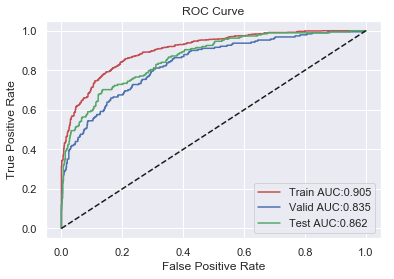

In [864]:
#ROC Curve
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion

Week 5: Briefly summarize your project and describe your performance as if you were talking to a CEO. 

The project is based on banking customer churn for loyal customers. The objective of the project is to "predict if a customer that was loyal for more than 3 years, will disassociate with the bank".Supervised machine learning using Python programming has been used to solve this type of classification problem.The feature engineering was performed by creating Numerical and Categorical features.For categorical features, one-hot encoding is applied to convert the values into binary vector representation.The entire dataset is divided into Training, Validation and Testing sample sets. The baseline prediction models are created using K-nearest neighbour, Logistic Regression, Stochastic Gradient Descent, Naive Bayes, Decision Tree, Random Forest and Gradient Boosting algorithms.

Based on performance metric Area Under Curve(AUC), Stochastic Gradient descent has been selected as baseline model with 75.5% score on validation data for further performance improvements. Alpha, a constant that is multiplied by regularization term, is altered for tuning the selected baseline model Stochastic Gradient descent and then alpha = 0.006 is found to be the optimal value on which Validation sample has the maximum AUC score.Using logistic regression and random forest feature importance, the variable Age found to have positive impact on banking customer churn. Tenure doesn't affect prediction which implies the people who are loyal or stayed longer in the bank are unlikely to leave.Hyperparameter tuning is carried on different predicting models to optimize the Validation set performance and Gradient Boosting is picked based on highest optimized validation AUC score as 83.4%. The model is then evaluated that has 86.2% AUC score that catches 75.0% of churn in the Bank with threshold of 0.5.

CONGRATS! 